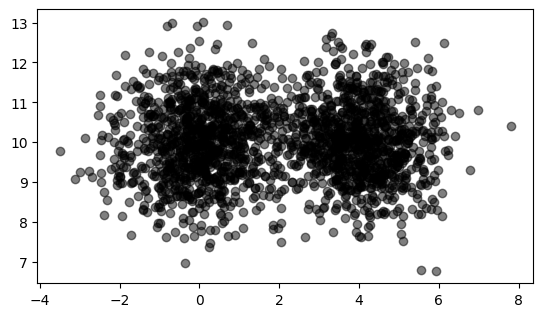

In [2]:
# サンプルデータ作成
import numpy as np

# seed値固定
np.random.seed(874)
# x座標
x = np.r_[np.random.normal(size=1000,loc=0,scale=1),
          np.random.normal(size=1000,loc=4,scale=1)]
# y座標
y = np.r_[np.random.normal(size=1000,loc=10,scale=1),
          np.random.normal(size=1000,loc=10,scale=1)]
data = np.c_[x, y]


# 可視化処理
import matplotlib.pyplot as plt


p = plt.subplot()
p.scatter(data[:,0], data[:,1], c = "black", alpha = 0.5)
p.set_aspect('equal')
plt.show()


# 非階層クラスタリング

### k-meansクラスタリング
$\boldsymbol{x} \in \mathbb{R}^d$で表された$N$この事例
$$
D = \{ \boldsymbol{x}_1, \boldsymbol{x}_2, \ldots , \boldsymbol{x}_N \} = \{\boldsymbol{x}_i\}^N_{i=1}
$$
これらを$K$このクラスタに分けたい。以降は$K$を既知として扱うが、$K$を決めるのもクラスタリングにおいて重要な課題である。
クラスタリングを行う流れとしては、同じクラスタ内の事例の間の距離が近く、異なるクラスタの事例の間の距離が遠くなるように各事例をクラスタに割り当てる。　　
k-means法では各クラスタ$C_k$を次のような中心ベクトル$\boldsymbol{\mu}_k$で代表させる。
$$
\boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum^{}_{i \in C_k} \boldsymbol{x}_i
$$
$C_k$のまとまり具合の尺度として$C_k$に属する事例ベクトルと中心ベクトルの二乗距離(L2ノルム)を使う。
$$
\sum^{}_{i \in C_k} || \boldsymbol{x}_i - \mu_k ||^2
$$
k-means法はすべてのクラスタ$(C_1, C_2, \ldots , C_k)$について計算し、以下の式を最小化させるような割り当てを求める。
$$
J = \sum^{K}_{k=1} \sum^{}_{i \in C_k} || \boldsymbol{x}_i - \mu_k ||^2
$$

### Lloydのアルゴリズム
前節で導出した目的関数を最小化させるクラスタの割り当てを求めることを考えるが、一般にこの問題はNP困難であるため、Lloydのアルゴリズムを使用して求める。
Lloydのアルゴリズムとは以下の試行である。
1. すべてのクラスタの中心$\boldsymbol{\mu}_k$を初期化する
2. 事例$\boldsymbol{x}$に関して最も近い$\boldsymbol{\mu}_k$を以下の式で求め、クラスタ$C_1, \ldots ,C_k$を作成
$$
k^* = \mathop{argmin}\limits_{k \in \{1, \ldots ,K\}}\|\boldsymbol{x}_i - \boldsymbol{\mu}_k \|^2
$$
3. すべてのクラスの中心$\boldsymbol{\mu}_k$を以下で計算する。
$$
\boldsymbol{\mu}_k = \frac{1}{C_k} \sum^{}_{i \in C_k} \boldsymbol{x}_i
$$
4. 2、3をクラスタが変化しなくなるまで繰り返す。

### 目的関数の最小化
k-means法における目的関数は以下のようであった。
$$
J = \sum^{K}_{k=1} \sum^{}_{i \in C_k} \|\boldsymbol{x}_i - \boldsymbol{\mu}_k \|^2
$$
データ$D = \{\boldsymbol{x}_i \}^N_{i=1}$は不変なので目的関数は$C_1, \ldots ,C_k$、$\boldsymbol{\mu}_1, \ldots , \boldsymbol{\mu}_k$の関数である。　　
$C_1, \ldots ,C_k$、$\boldsymbol{\mu}_1, \ldots , \boldsymbol{\mu}_k$を交互に更新させ、目的関数を最小化させることを考える。
(i)$\boldsymbol{\mu}$を固定し、目的関数を最小にするクラスタ割り当て$C_1, \ldots, C_k$を求める。
$\boldsymbol{\mu}$が固定のとき、ある事例はいずれかのクラスタに属するので、ある事例$\boldsymbol{x}$がほかの事例$\boldsymbol{x}$のクラスタ割り当てに影響したり、目的関数の値を変化させてしまうこともない。  
したがって$\boldsymbol{x}_i$ごとに距離が最小になるクラスタ中心$\boldsymbol{\mu}_k$を選ぶ。
$$
\mathop{argmin} \limits_{k \in \{1, \ldots ,K\}} = \| \boldsymbol{x}_i - \boldsymbol{\mu}_k \|^2
$$
(ii)クラスタ割り当て$C_1, \ldots ,C_k$を固定して、クラスタ中心$\boldsymbol{\mu}$を求める。
目的関数において書くクラスタ中心$\boldsymbol{\mu}_k$間に依存する関係はないので、すべての$k \in \mathbb N_k$に対し目的関数を最小にするクラスタ中心$\boldsymbol{\mu}_k$を求める。
$$
\begin{align}
\frac{\partial J}{\partial \boldsymbol{\mu}_k} &= 0 \notag \\
-2 \sum^{}_{i \in C_k} (\boldsymbol{x}_i - \boldsymbol{\mu}_k) &= 0 \notag \\
\sum^{}_{i \in C_k} \boldsymbol{x}_i - |C_k| \boldsymbol{\mu}_k &= 0 \notag \\
\boldsymbol{\mu}_k &= \frac{1}{C_k} \sum^{}_{i \in C_k} \boldsymbol{x}_i \notag 
\end{align}
$$



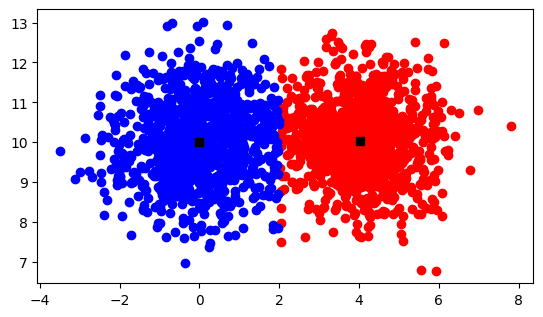

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters_sklearn = km.fit_predict(data)


p = plt.subplot()
p.scatter(data[clusters_sklearn==0, 0], data[clusters_sklearn==0, 1], c = 'red')
p.scatter(data[clusters_sklearn==1, 0], data[clusters_sklearn==1, 1], c = 'blue')
p.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[: ,1], color='black', marker='s')
p.set_aspect('equal')
plt.show()
